In [1]:
from xgboost import XGBRegressor as XGBR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
shap.initjs()

In [2]:
data = pd.read_csv('Startegy1.csv')

In [3]:
X = data.drop(columns=['band_gap','pretty_formula'])
Y = data.loc[:,'band_gap']

In [4]:
from sklearn.preprocessing import StandardScaler
col = X.columns.tolist()
X_sta = np.copy(X)
X_sta = pd.DataFrame(X_sta)
X_sta.columns = col
X_sta.loc[:,col] = StandardScaler().fit_transform(X_sta.loc[:,col])
X_sta.columns = X_sta.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [5]:
X.columns = X_sta.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [6]:
xgb = XGBR(random_state=30
            ,n_estimators = 382
            ,eta = 0.0263
            ,reg_alpha = 0
            ,reg_lambda = 0
            ,gamma = 0
            ,max_depth = 10
            ,colsample_bytree = 1
            ,colsample_bylevel = 0.5
            ,colsample_bynode = 1
            ,min_child_weight = 9.998
            )

xgb = xgb.fit(X,Y)

In [7]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [44]:
#CsPbCl3 exp:  dft:2.8506
shap.force_plot(explainer.expected_value, shap_values[272, :], X.iloc[272, :])

In [42]:
#CsPbBr3 exp:  dft:2.0087
shap.force_plot(explainer.expected_value, shap_values[1065, :], X.iloc[1065, :])

In [41]:
#CsPbI3 exp:  dft:1.6364
shap.force_plot(explainer.expected_value, shap_values[970, :], X.iloc[970, :])

In [40]:
#CsSnCl3 exp:  dft:3.1375
shap.force_plot(explainer.expected_value, shap_values[870, :], X.iloc[870, :])

In [39]:
#CsSnBr3 exp:  dft:2.385
shap.force_plot(explainer.expected_value, shap_values[1317, :], X.iloc[1317, :])

In [38]:
#CsSnI3 exp:1.31  dft:1.2661
shap.force_plot(explainer.expected_value, shap_values[909, :], X.iloc[909, :])

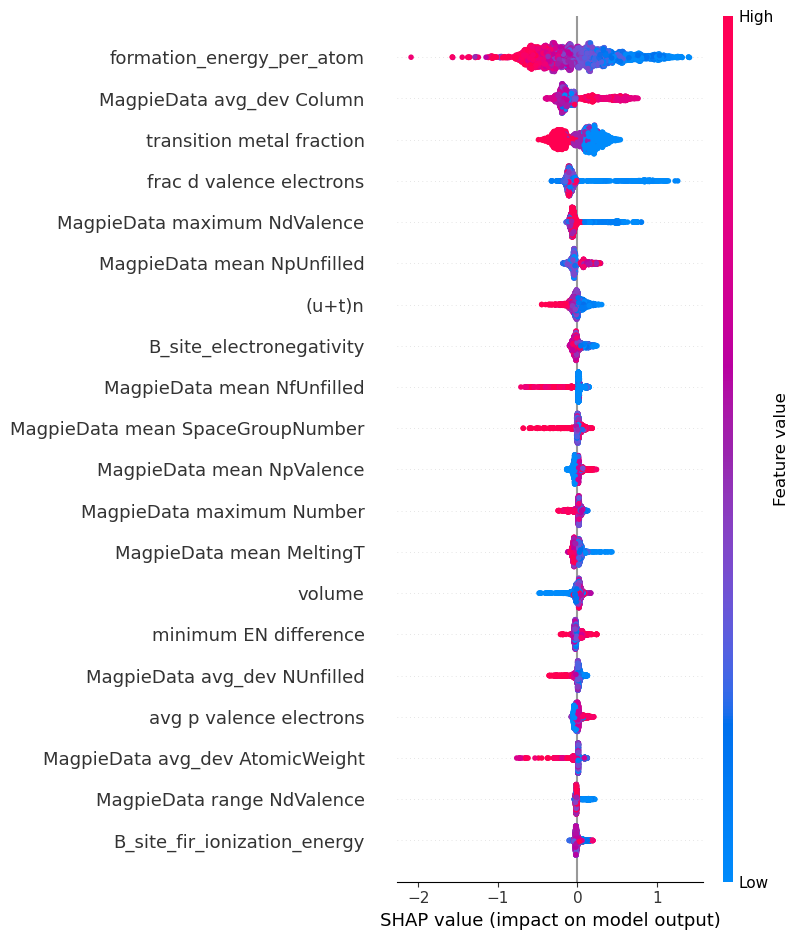

<Figure size 640x480 with 0 Axes>

In [12]:
shap.summary_plot(shap_values, X)

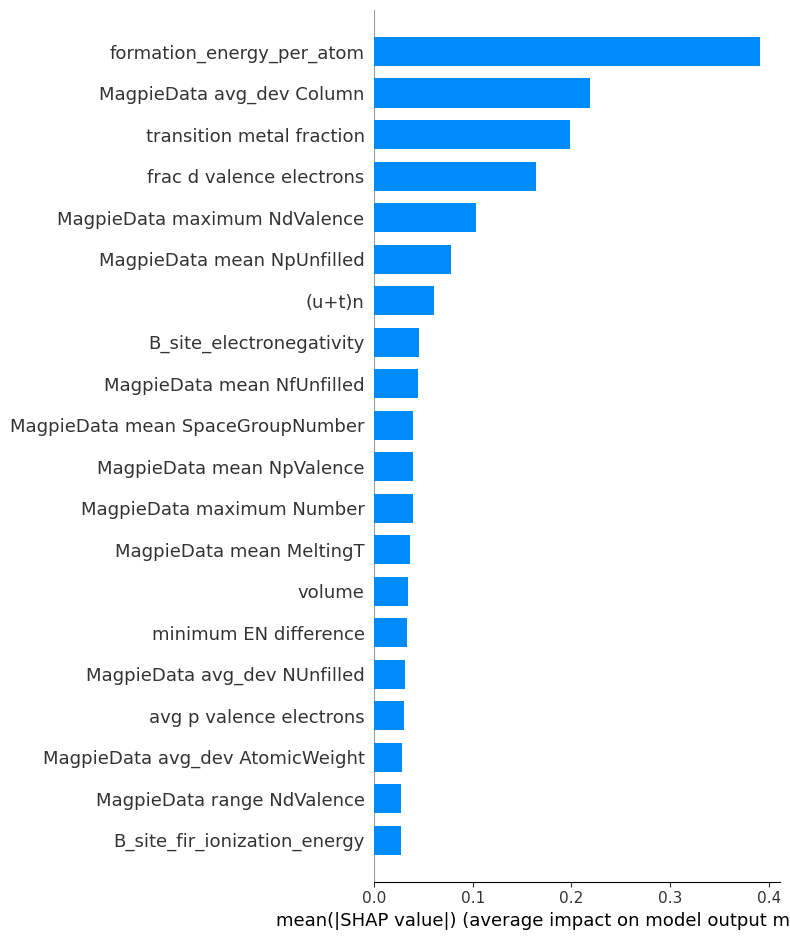

In [18]:
shap.summary_plot(shap_values, X, plot_type="bar")

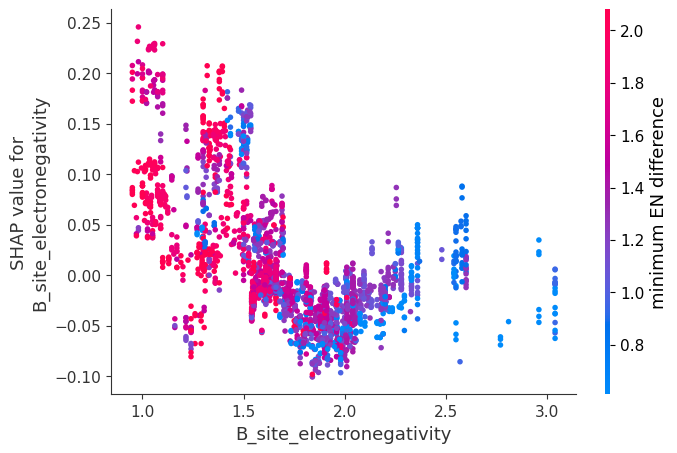

In [9]:
shap.dependence_plot(
    "B_site_electronegativity", shap_values, X,interaction_index="minimum EN difference"
)

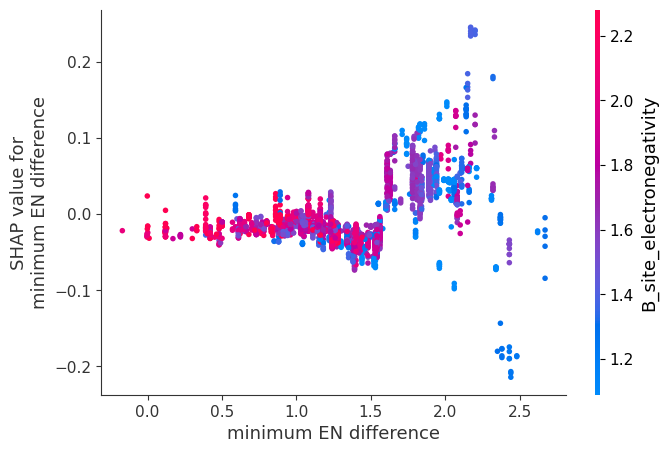

In [12]:
shap.dependence_plot(
    "minimum EN difference", shap_values, X,interaction_index="B_site_electronegativity"
)

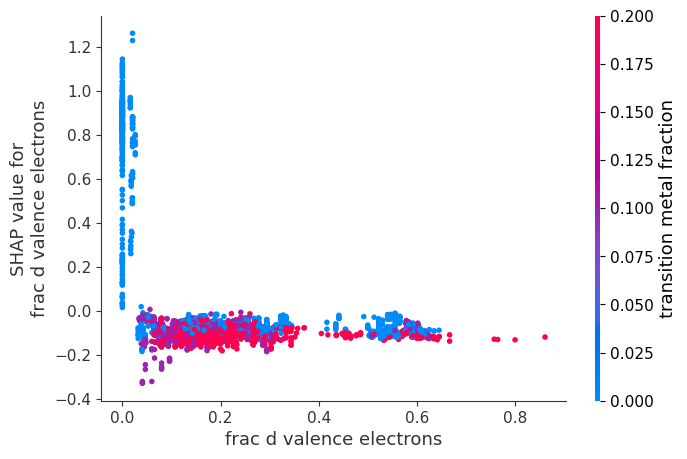

In [14]:
shap.dependence_plot(
    "frac d valence electrons", shap_values, X, interaction_index="transition metal fraction"
)


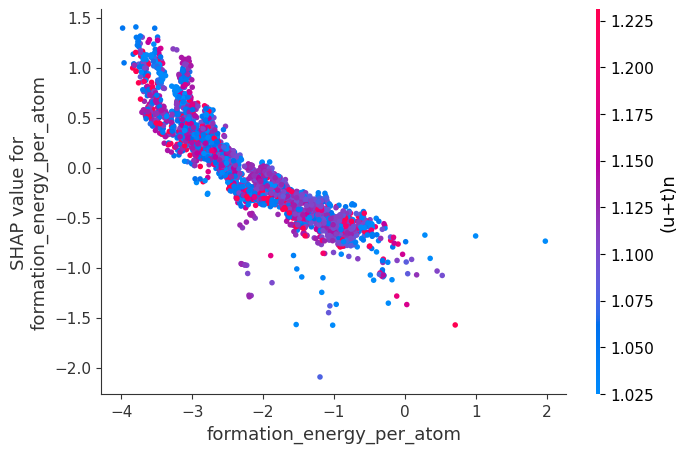

In [24]:
shap.dependence_plot(
    "formation_energy_per_atom",shap_values, X,interaction_index="(u+t)n"
)


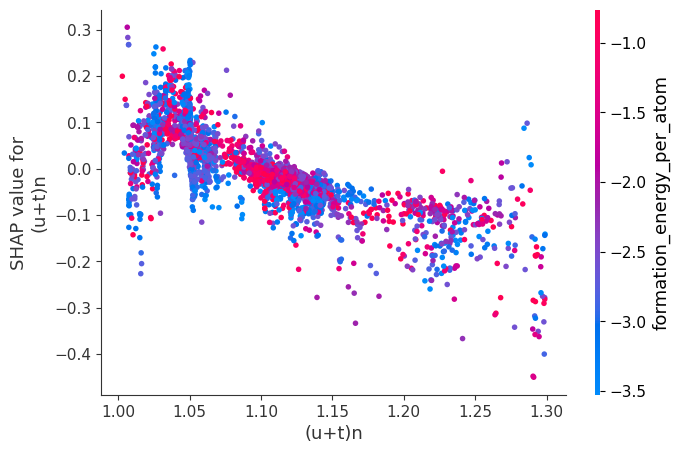

In [25]:
shap.dependence_plot(
    "(u+t)n",shap_values, X,interaction_index="formation_energy_per_atom"
)

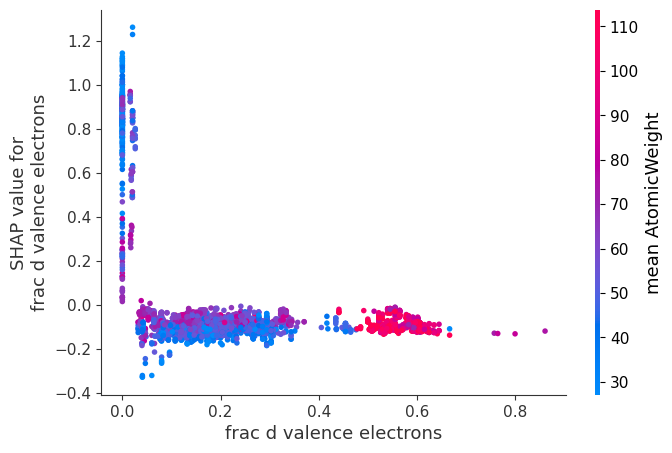

In [31]:
shap.dependence_plot(
    "frac d valence electrons", shap_values, X
)


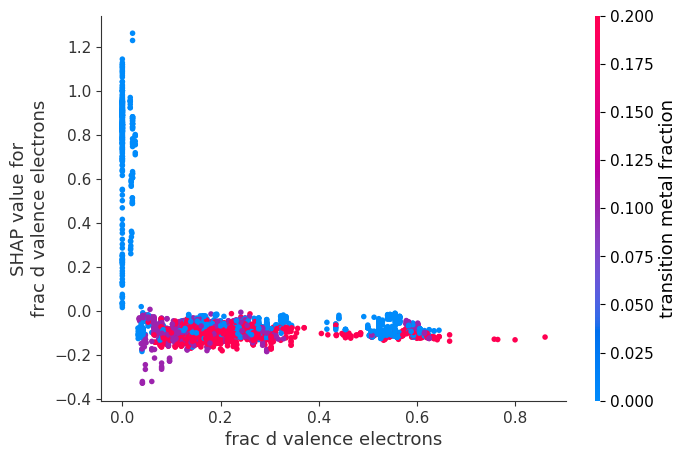

In [26]:
shap.dependence_plot(
    "frac d valence electrons",shap_values, X,interaction_index="transition metal fraction"
)

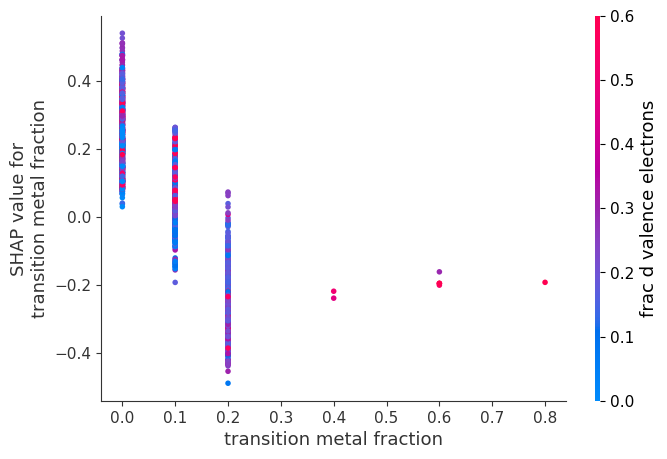

In [27]:
shap.dependence_plot(
    "transition metal fraction",shap_values, X,interaction_index="frac d valence electrons"
)